In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
dataframe_train = pd.read_csv(r'.\data\train.csv') 
dataframe_test = pd.read_csv(r'.\data\test.csv')

LotFrontage: 259
Alley: 1369
FireplaceQu: 690
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


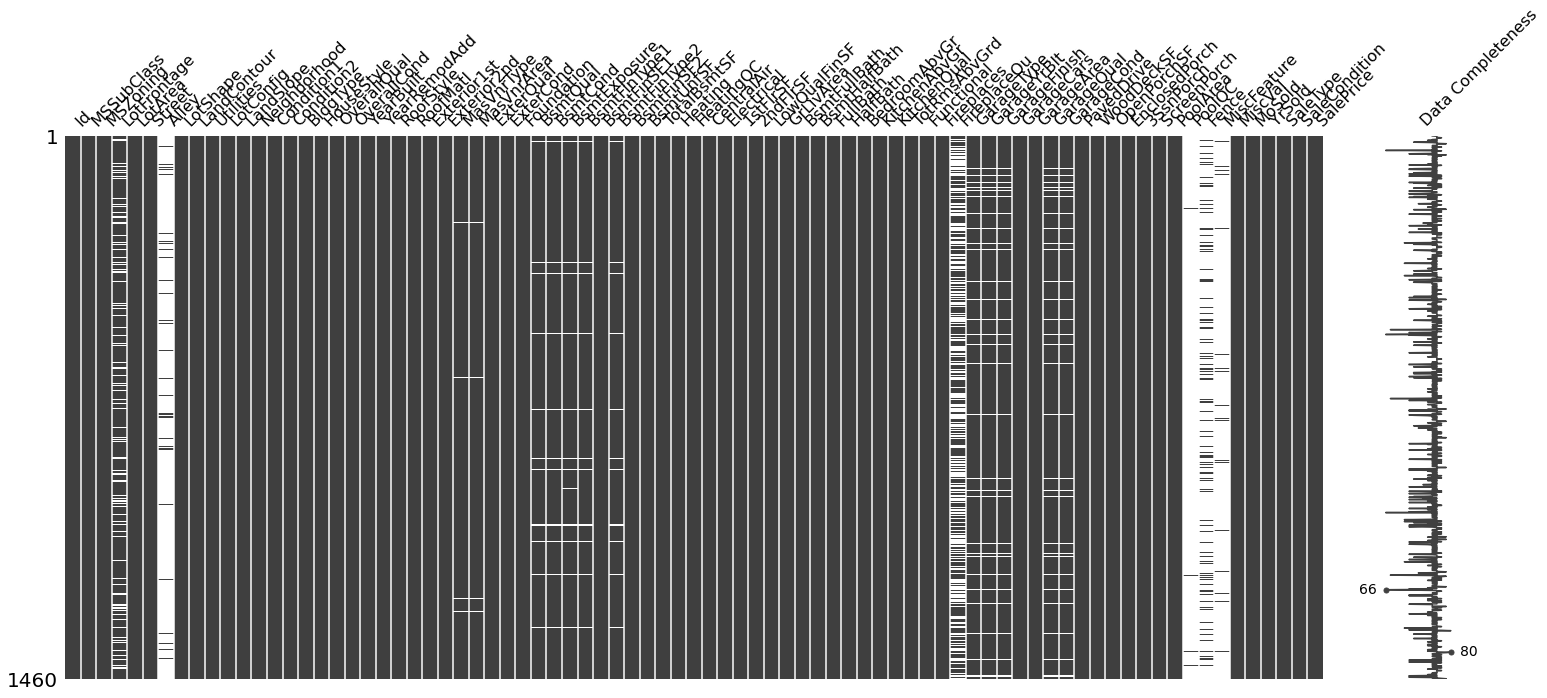

In [3]:
msno.matrix(dataframe_train, labels=True)

dict_ = dataframe_train.isnull().sum().to_dict()
cols_to_drop = []
for key, value in dict_.items():
    if (value > 100):
        print(f'{key}: {value}')
        cols_to_drop.append(key)
cols_to_drop.append('Id')

In [4]:
dataframe_working = dataframe_train.copy()
dataframe_working = dataframe_working.drop(columns=cols_to_drop)
dataframe_working.columns
print(f'Dataframe shape: {dataframe_train.shape}')

Dataframe shape: (1460, 81)


In [5]:
dataframe_working.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [6]:
dict_ = dataframe_working.isnull().sum().to_dict()
for key, value in dict_.items():
    if (value > 0):
        print(f'key:{key} value:{value}')

key:MasVnrType value:8
key:MasVnrArea value:8
key:BsmtQual value:37
key:BsmtCond value:37
key:BsmtExposure value:38
key:BsmtFinType1 value:37
key:BsmtFinType2 value:38
key:Electrical value:1
key:GarageType value:81
key:GarageYrBlt value:81
key:GarageFinish value:81
key:GarageQual value:81
key:GarageCond value:81


Text(0, 0.5, 'Sales Price')

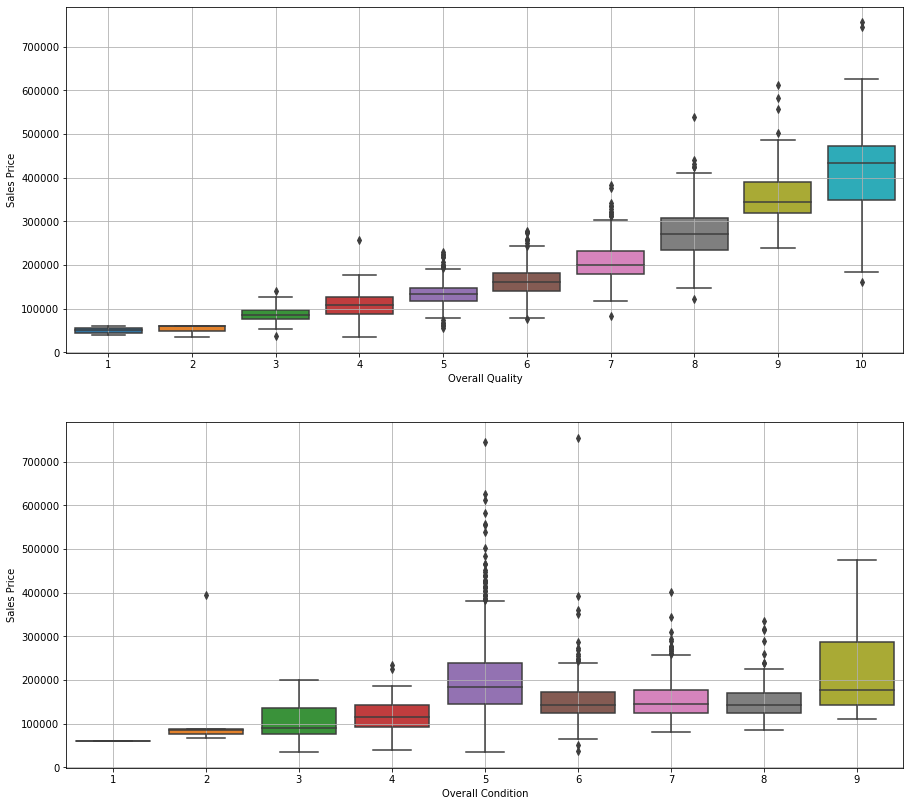

In [7]:
fig = plt.figure(figsize=(15, 14))
ax1 = fig.add_subplot(211)
sns.boxplot(x='OverallQual', y='SalePrice', data=dataframe_working)
ax1.grid(True)
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel('Sales Price')
ax2 = fig.add_subplot(212)
sns.boxplot(x='OverallCond', y='SalePrice', data=dataframe_working)
ax2.grid(True)
ax2.set_xlabel('Overall Condition')
ax2.set_ylabel('Sales Price')

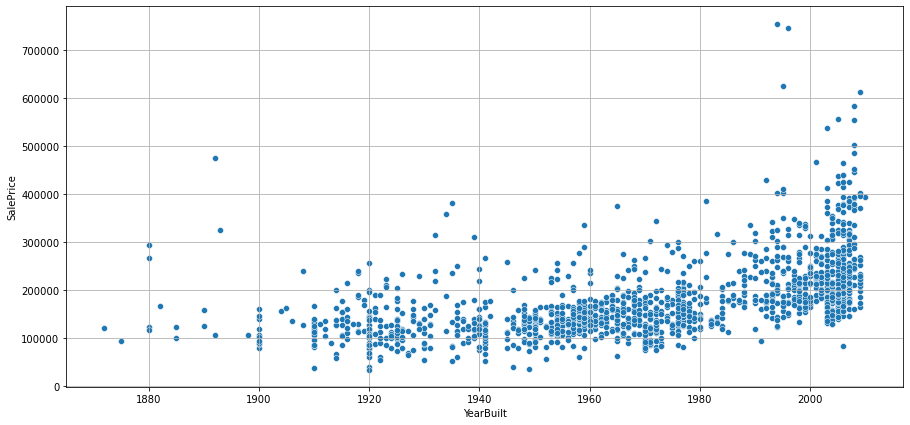

In [8]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=dataframe_working)
ax.grid(True)

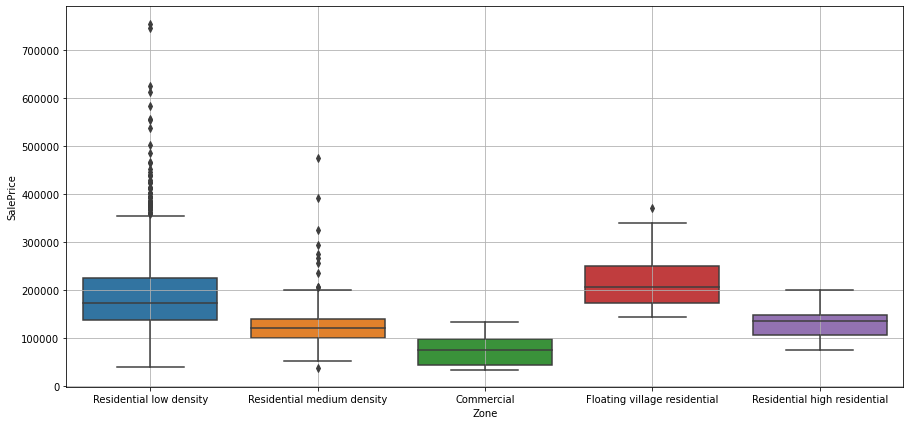

In [9]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.boxplot(x='MSZoning', y='SalePrice', data=dataframe_working)
ax.set_xticklabels(labels=['Residential low density', 'Residential medium density', 'Commercial', 'Floating village residential', 'Residential high residential'])
ax.set_xlabel('Zone')
ax.grid(True)

<AxesSubplot:>

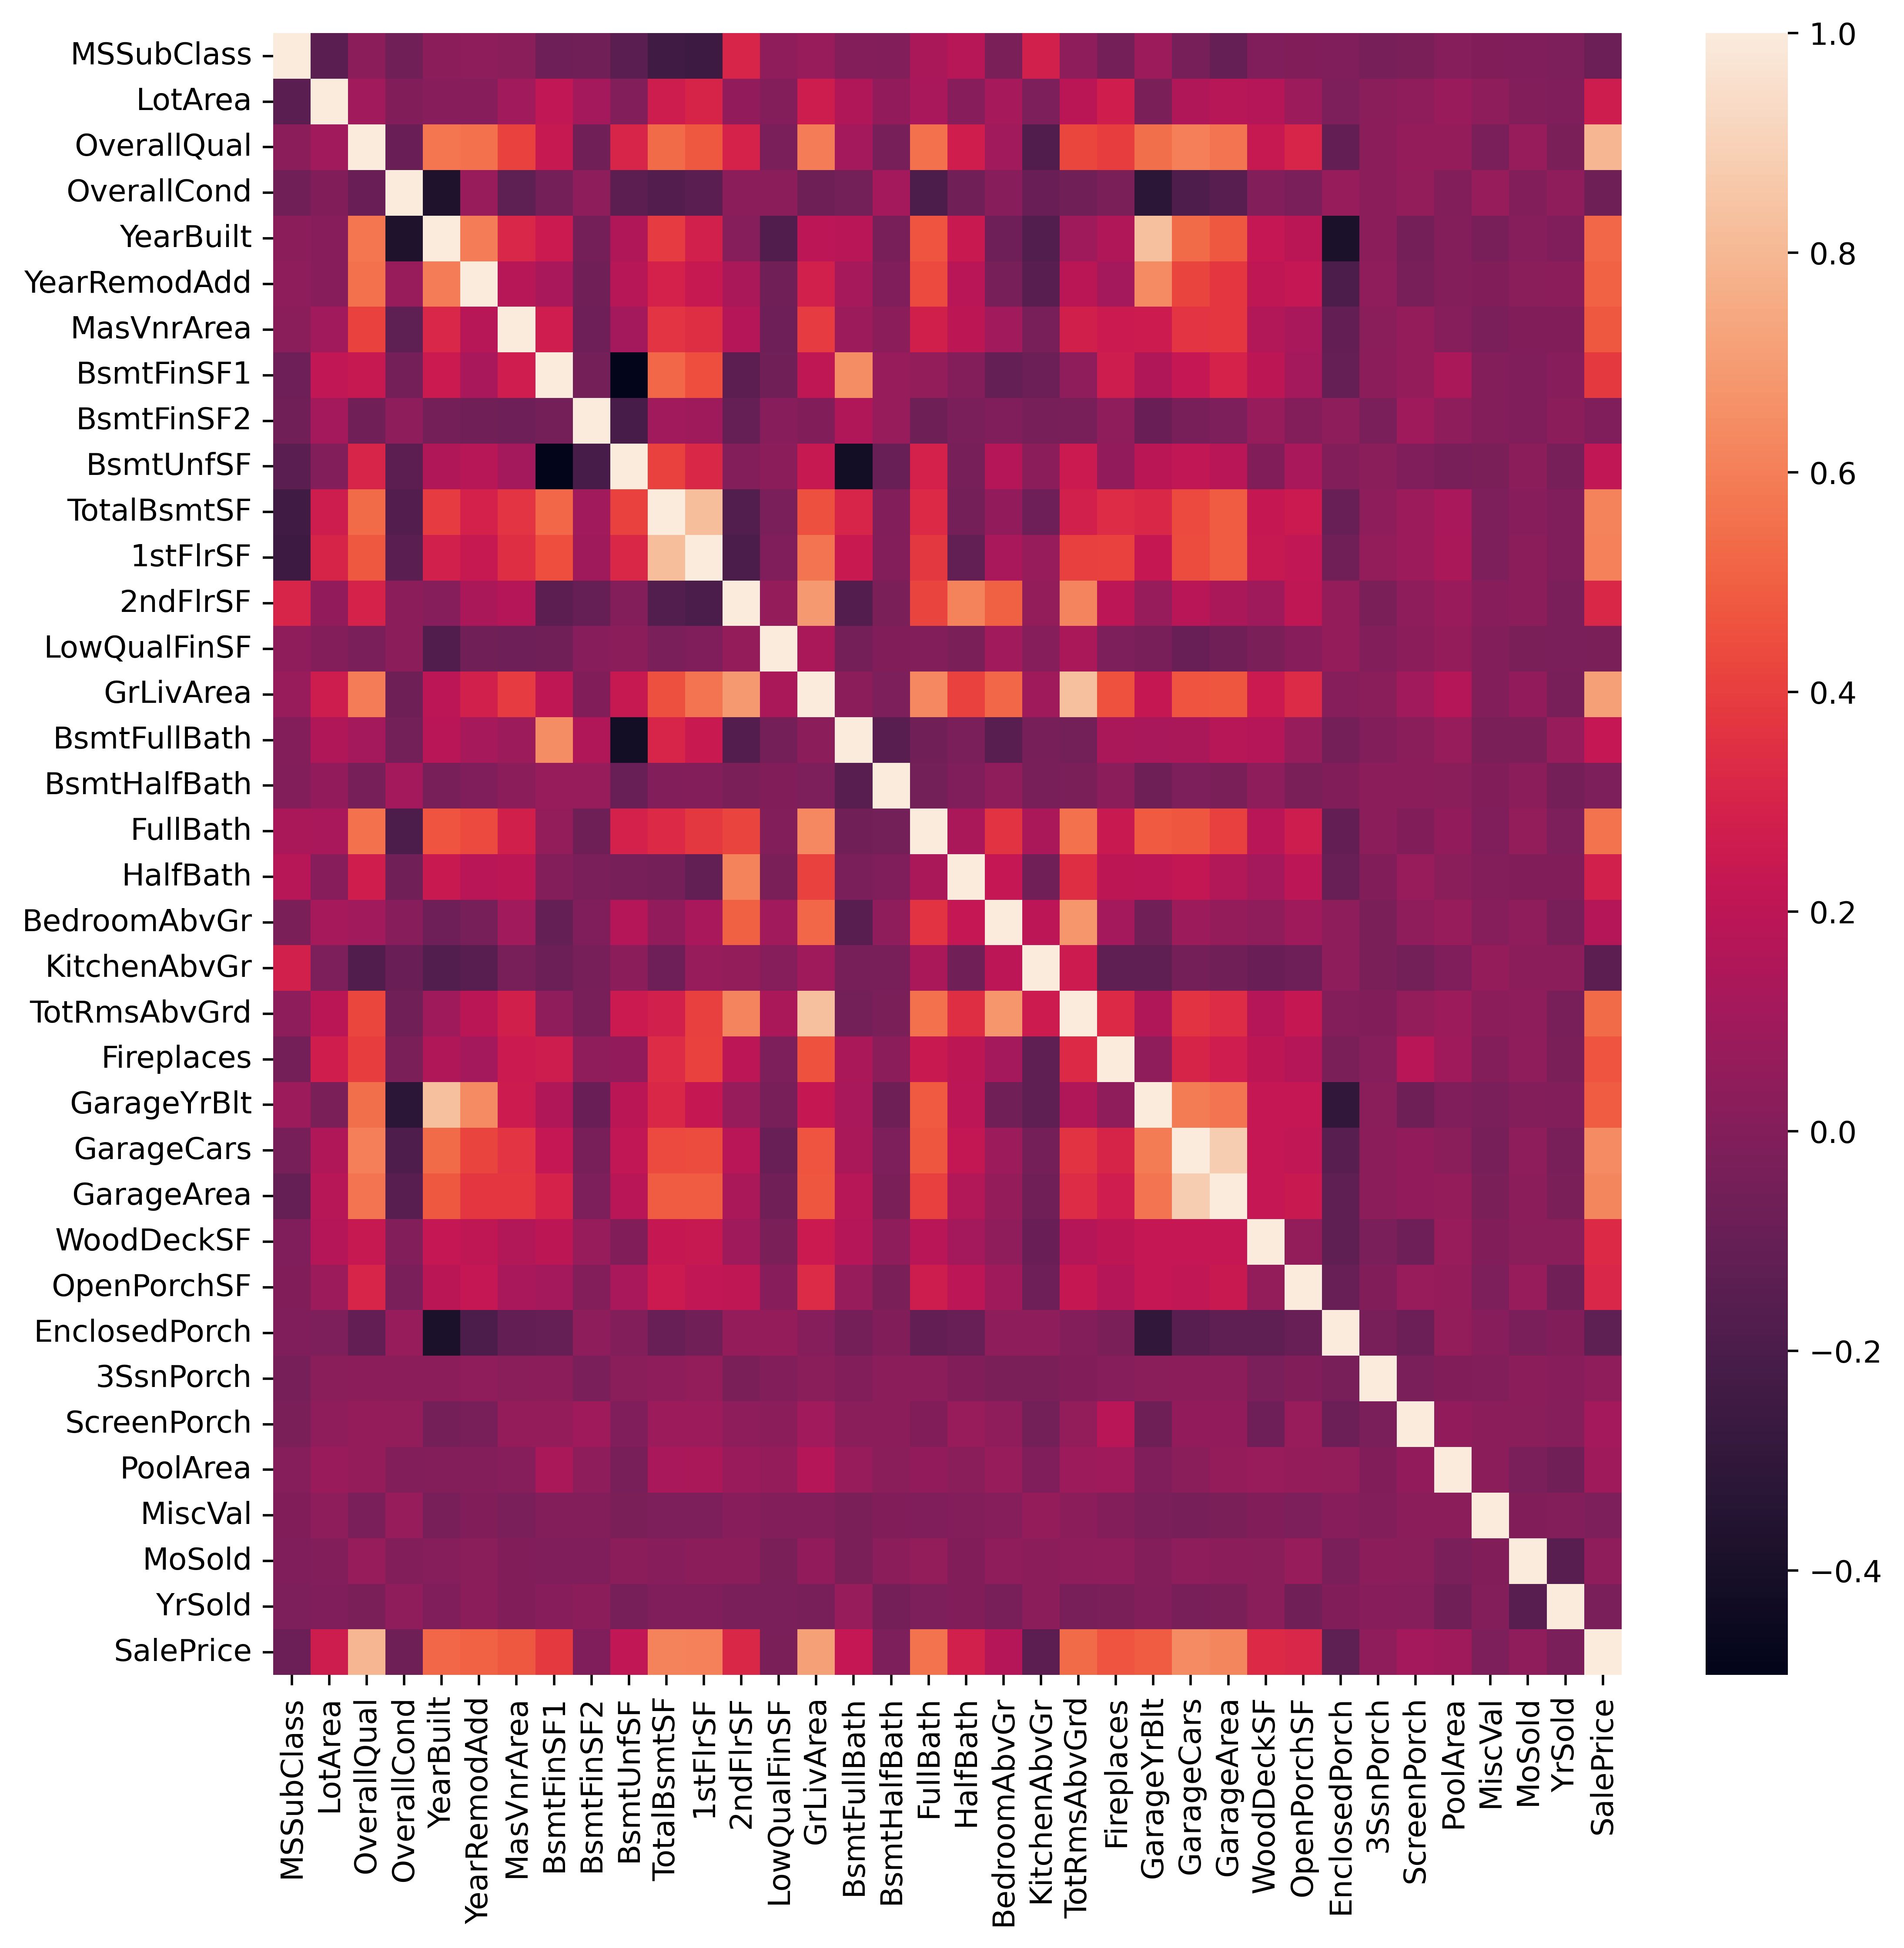

In [10]:
fig = plt.figure(figsize=(10, 10), dpi=500)
ax = fig.add_subplot(111)
sns.heatmap(dataframe_working.corr())

In [11]:
dataframe = dataframe_working.dropna()
X = dataframe.drop(['SalePrice'], axis=1)
y = dataframe['SalePrice']

labelEncoder = LabelEncoder()
X['MSZoning'] = labelEncoder.fit_transform(X['MSZoning'])
X['Street'] = labelEncoder.fit_transform(X['Street'])
X['LotShape'] = labelEncoder.fit_transform(X['LotShape'])
X['LandContour'] = labelEncoder.fit_transform(X['LandContour'])
X['Utilities'] = labelEncoder.fit_transform(X['Utilities'])
X['LotConfig'] = labelEncoder.fit_transform(X['LotConfig'])
X['LandSlope'] = labelEncoder.fit_transform(X['LandSlope'])
X['Neighborhood'] = labelEncoder.fit_transform(X['Neighborhood'])
X['Condition1'] = labelEncoder.fit_transform(X['Condition1'])
X['Condition2'] = labelEncoder.fit_transform(X['Condition2'])
X['BldgType'] = labelEncoder.fit_transform(X['BldgType'])
X['HouseStyle'] = labelEncoder.fit_transform(X['HouseStyle'])
X['RoofStyle'] = labelEncoder.fit_transform(X['RoofStyle'])
X['RoofMatl'] = labelEncoder.fit_transform(X['RoofMatl'])
X['Exterior1st'] = labelEncoder.fit_transform(X['Exterior1st'])
X['Exterior2nd'] = labelEncoder.fit_transform(X['Exterior2nd'])
X['MasVnrType'] = labelEncoder.fit_transform(X['MasVnrType'])
X['ExterQual'] = labelEncoder.fit_transform(X['ExterQual'])
X['ExterCond'] = labelEncoder.fit_transform(X['ExterCond'])
X['Foundation'] = labelEncoder.fit_transform(X['Foundation'])
X['BsmtQual'] = labelEncoder.fit_transform(X['BsmtQual'])
X['BsmtCond'] = labelEncoder.fit_transform(X['BsmtCond'])
X['BsmtExposure'] = labelEncoder.fit_transform(X['BsmtExposure'])
X['BsmtFinType1'] = labelEncoder.fit_transform(X['BsmtFinType1'])
X['BsmtFinType2'] = labelEncoder.fit_transform(X['BsmtFinType2'])
X['Heating'] = labelEncoder.fit_transform(X['Heating'])
X['HeatingQC'] = labelEncoder.fit_transform(X['HeatingQC'])
X['CentralAir'] = labelEncoder.fit_transform(X['CentralAir'])
X['Electrical'] = labelEncoder.fit_transform(X['Electrical'])
X['KitchenQual'] = labelEncoder.fit_transform(X['KitchenQual'])
X['Functional'] = labelEncoder.fit_transform(X['Functional'])
X['GarageType'] = labelEncoder.fit_transform(X['GarageType'])
X['GarageFinish'] = labelEncoder.fit_transform(X['GarageFinish'])
X['GarageQual'] = labelEncoder.fit_transform(X['GarageQual'])
X['GarageCond'] = labelEncoder.fit_transform(X['GarageCond'])
X['PavedDrive'] = labelEncoder.fit_transform(X['PavedDrive'])
X['SaleType'] = labelEncoder.fit_transform(X['SaleType'])
X['SaleCondition'] = labelEncoder.fit_transform(X['SaleCondition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [12]:
RMSE_LIST_TRAINING = {}
RMSE_LIST_TESTING = {}

def model_eval(model, title, X_train, X_test, y_train, y_test):
    prediction_training = model.predict(X_train)
    prediction_testing = model.predict(X_test)
    
    rmse_training = np.sqrt(mean_squared_error(y_train, prediction_training))
    rmse_testing = np.sqrt(mean_squared_error(y_test, prediction_testing))
    
    print(f'{title} RMSE on training set: {rmse_training}')
    print(f'{title} RMSE on testing set: {rmse_testing}')

    RMSE_LIST_TRAINING[title] = rmse_training 
    RMSE_LIST_TESTING[title] = rmse_testing
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    sns.scatterplot(x=prediction_training, y=y_train, color='blue', label='Training data')
    sns.scatterplot(x=prediction_testing, y=y_test, color='red', label='Validation data')

    ax.set_title(title)
    ax.set_xlabel('Predicted Values')
    ax.legend(loc='best')

Linear Regression RMSE on training set: 24358.561652925728
Linear Regression RMSE on testing set: 55189.33638117506
Logistic Regression RMSE on training set: 2563.3011568118213
Logistic Regression RMSE on testing set: 57115.60955647293
Ridge Regression RMSE on training set: 24358.95962806963
Ridge Regression RMSE on testing set: 55182.51066456452
Lasso Regression RMSE on training set: 24358.56187643645
Lasso Regression RMSE on testing set: 55189.28095676163
Decision Tree Regression RMSE on training set: 0.0
Decision Tree Regression RMSE on testing set: 44984.00437607203
Random Forest Regression RMSE on training set: 10034.505216133817
Random Forest Regression RMSE on testing set: 36069.8052017577
Gradient Boosting Regression RMSE on training set: 2831.476213186527
Gradient Boosting Regression RMSE on testing set: 39004.80721024725
SVR RMSE on training set: 34557.364894765444
SVR RMSE on testing set: 55531.535598281815
XGBoost Regression RMSE on training set: 15.300113222826187
XGBoost 

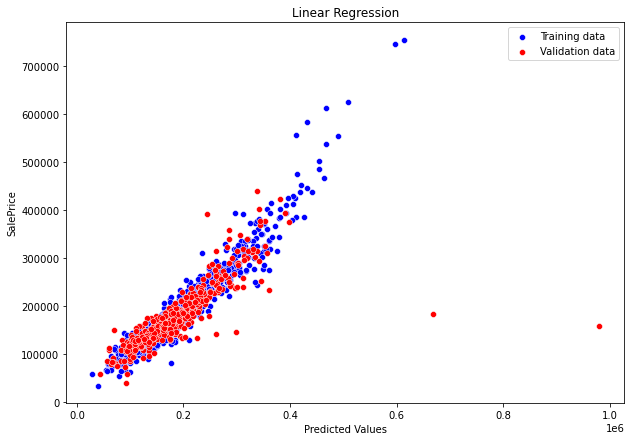

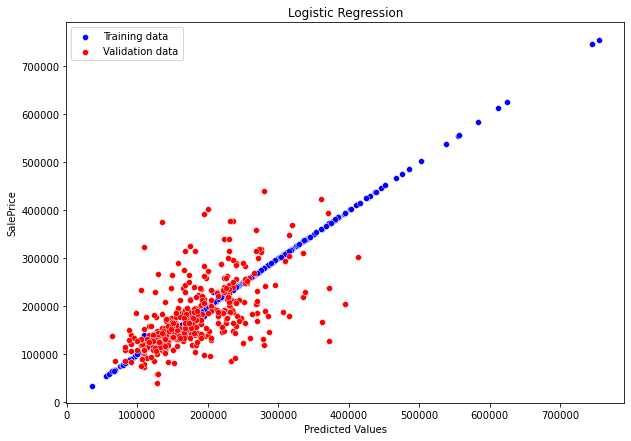

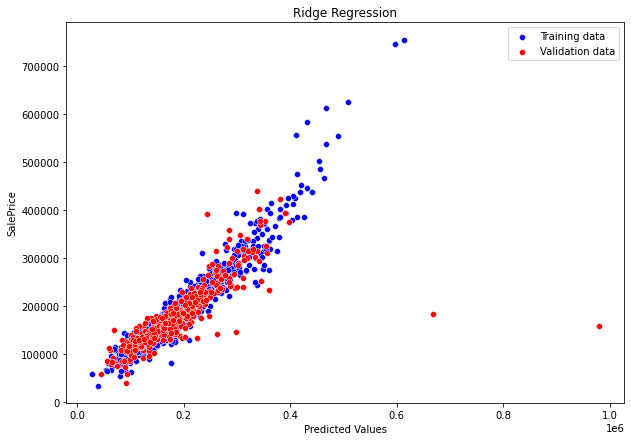

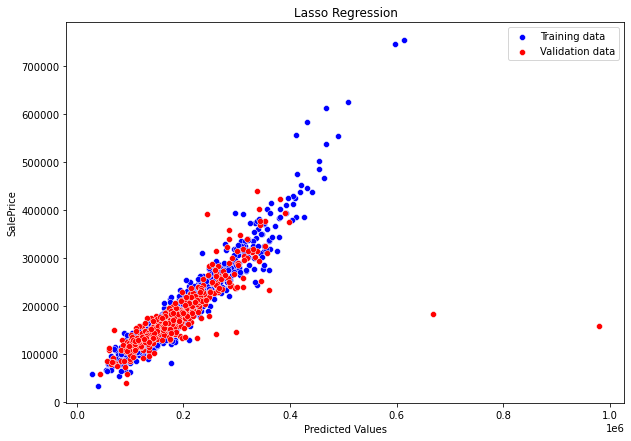

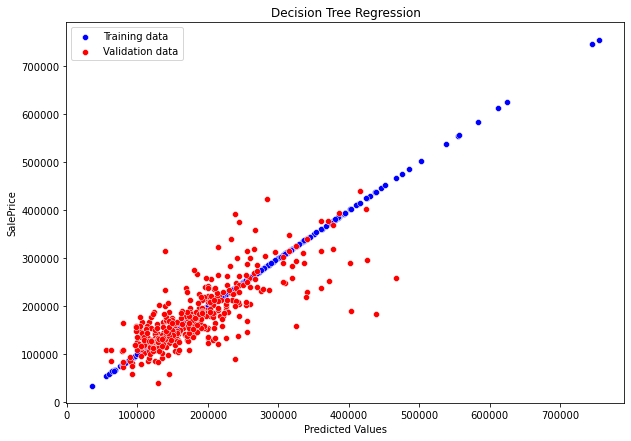

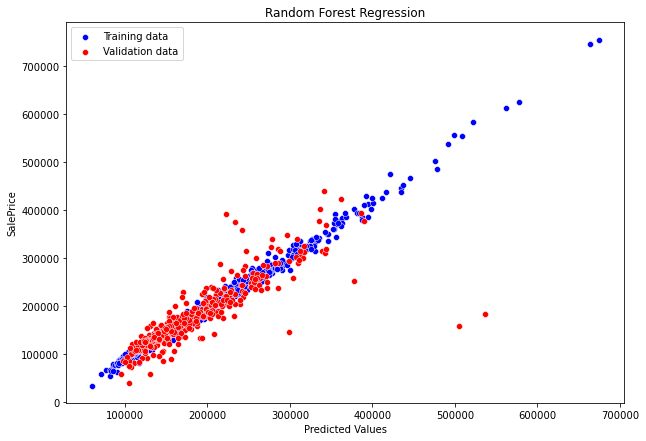

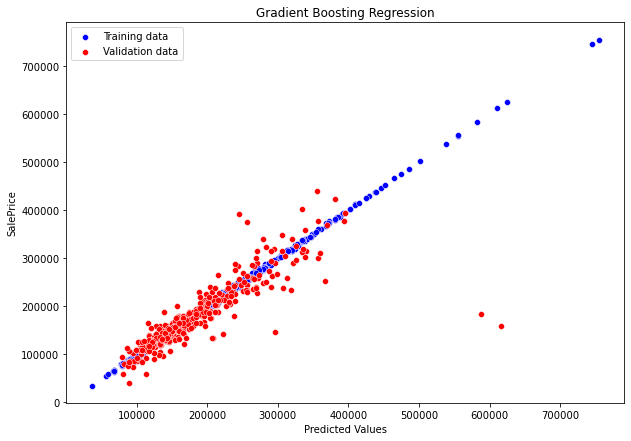

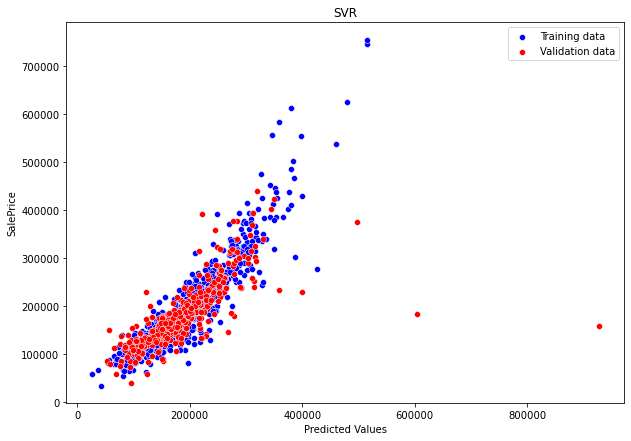

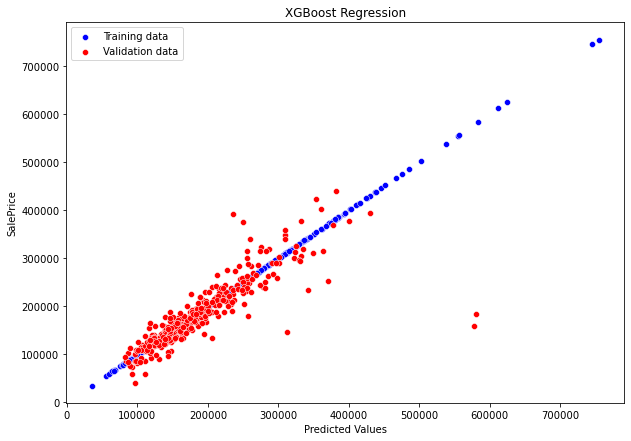

In [13]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
model_eval(model_linear_regression, 'Linear Regression', X_train, X_test, y_train, y_test)

model_logistic_regression = LogisticRegression(penalty='l2', solver='liblinear', max_iter=300)
model_logistic_regression.fit(X_train, y_train)
model_eval(model_logistic_regression, 'Logistic Regression', X_train, X_test, y_train, y_test)

model_ridge_regression = Ridge(alpha=0.1, solver='auto', random_state=42)
model_ridge_regression.fit(X_train, y_train)
model_eval(model_ridge_regression, 'Ridge Regression', X_train, X_test, y_train, y_test)

model_lasso_regression = Lasso(alpha=0.1, precompute=True, max_iter=500, random_state=42)
model_lasso_regression.fit(X_train, y_train)
model_eval(model_lasso_regression, 'Lasso Regression', X_train, X_test, y_train, y_test)

model_decision_tree_regressor = DecisionTreeRegressor(random_state=42, max_features='sqrt')
model_decision_tree_regressor.fit(X_train, y_train)
model_eval(model_decision_tree_regressor, 'Decision Tree Regression', X_train, X_test, y_train, y_test)

model_random_forest_regressor = RandomForestRegressor(n_estimators=500, random_state=42, max_features='log2')
model_random_forest_regressor.fit(X_train, y_train)
model_eval(model_random_forest_regressor, 'Random Forest Regression', X_train, X_test, y_train, y_test)

model_gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
model_gradient_boosting_regressor.fit(X_train, y_train)
model_eval(model_gradient_boosting_regressor, 'Gradient Boosting Regression', X_train, X_test, y_train, y_test)

model_svr = SVR(kernel='linear', C=2.0, epsilon=0.3)
model_svr.fit(X_train, y_train)
model_eval(model_svr, 'SVR', X_train, X_test, y_train, y_test)

model_xgboost_regressor = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.9)
model_xgboost_regressor.fit(X_train, y_train)
model_eval(model_xgboost_regressor, 'XGBoost Regression', X_train, X_test, y_train, y_test)

In [14]:
print('Testing errors: ')
for name, val in RMSE_LIST_TESTING.items():
    print(f'Model {name}: ______{val}_____')

print('\n\nTraning errors: ')
for name, val in RMSE_LIST_TRAINING.items():
    print(f'Model {name}: ______{val}_____')

Testing errors: 
Model Linear Regression: ______55189.33638117506_____
Model Logistic Regression: ______57115.60955647293_____
Model Ridge Regression: ______55182.51066456452_____
Model Lasso Regression: ______55189.28095676163_____
Model Decision Tree Regression: ______44984.00437607203_____
Model Random Forest Regression: ______36069.8052017577_____
Model Gradient Boosting Regression: ______39004.80721024725_____
Model SVR: ______55531.535598281815_____
Model XGBoost Regression: ______38166.50035059758_____


Traning errors: 
Model Linear Regression: ______24358.561652925728_____
Model Logistic Regression: ______2563.3011568118213_____
Model Ridge Regression: ______24358.95962806963_____
Model Lasso Regression: ______24358.56187643645_____
Model Decision Tree Regression: ______0.0_____
Model Random Forest Regression: ______10034.505216133817_____
Model Gradient Boosting Regression: ______2831.476213186527_____
Model SVR: ______34557.364894765444_____
Model XGBoost Regression: ______1

<b>FEATURE SELECTION</b>

In [15]:
dataframe = dataframe_working.dropna()
dataframe_copy = dataframe[dataframe['SalePrice'] < 450000]
dataframe_copy.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


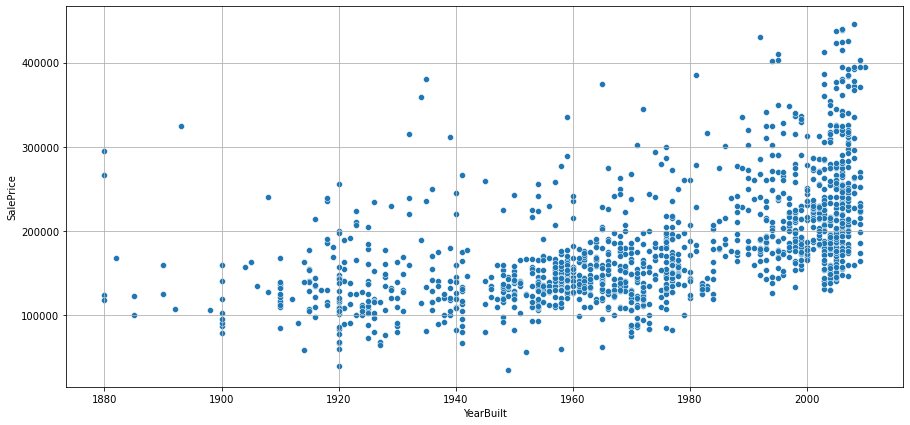

In [16]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=dataframe_copy)
ax.grid(True)

In [17]:
class MultiColumnEncoder:
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else: 
            for col_name, col in output.iteritems():
                output[col_name] = LabelEncoder().fit_transform(col)
        return output
    def fit_transform(self, X, y = None):
        return self.fit(X, y).transform(X)

index, values = list((dataframe_copy.dtypes).index), list((dataframe_copy.dtypes).values)
columns_for_encoding = []
for i in range(0, len(values)):
    if (values[i] is np.dtype('O')):
        columns_for_encoding.append(index[i])

dataframe_encoded = MultiColumnEncoder(columns=columns_for_encoding).fit_transform(dataframe_copy)
dataframe_encoded.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


<AxesSubplot:>

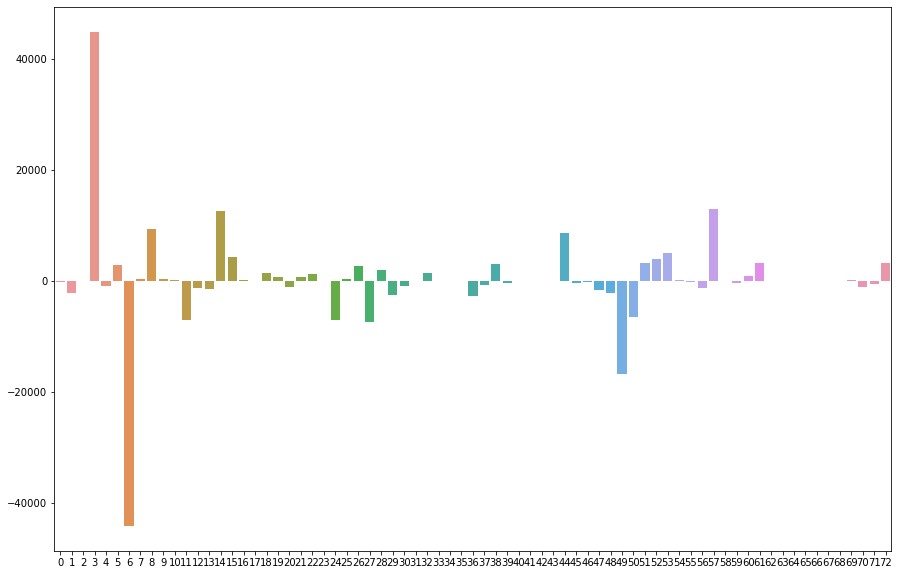

In [18]:
X = dataframe_encoded.drop(columns=['SalePrice'])
y = dataframe_encoded['SalePrice']

model = LinearRegression()
model.fit(X, y)
importance = model.coef_

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
sns.barplot(x = [x for x in range(len(importance))], y = importance, ax=ax)

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=10)
X_selected = fs.fit_transform(X, y)
X_selected.shape

(1325, 10)

In [20]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_selected, y, random_state=42, test_size=0.3)

Linear Regression FS RMSE on training set: 27979.510424274424
Linear Regression FS RMSE on testing set: 45191.635013106315


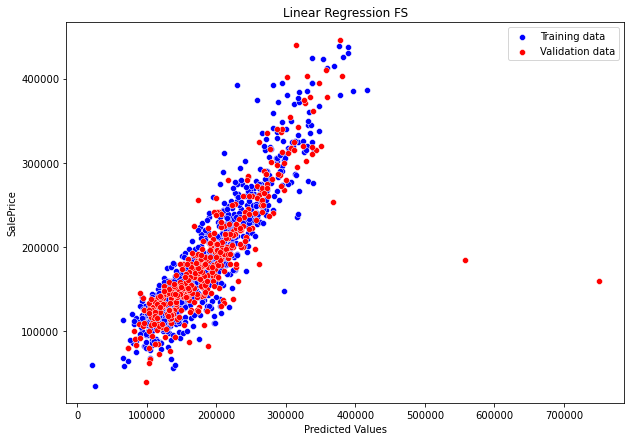

In [21]:
model_linear_regression_fs = LinearRegression()
model_linear_regression_fs.fit(X_train_, y_train_)
model_eval(model_linear_regression_fs, 'Linear Regression FS', X_train_, X_test_, y_train_, y_test_)

Logistic Regression FS RMSE on training set: 38881.58186094939
Logistic Regression FS RMSE on testing set: 50855.190187531996


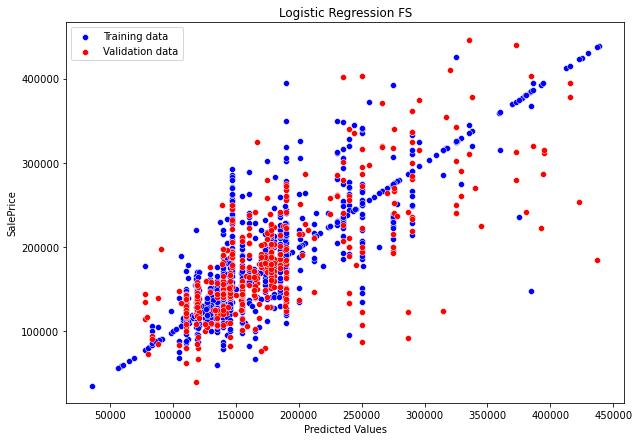

In [22]:
model_logistic_regression_fs = LogisticRegression(penalty='l2', solver='liblinear', max_iter=300)
model_logistic_regression_fs.fit(X_train_, y_train_)
model_eval(model_logistic_regression_fs, 'Logistic Regression FS', X_train_, X_test_, y_train_, y_test_)

Ridge Regression FS RMSE on training set: 27979.510623426886
Ridge Regression FS RMSE on testing set: 45192.04706038173


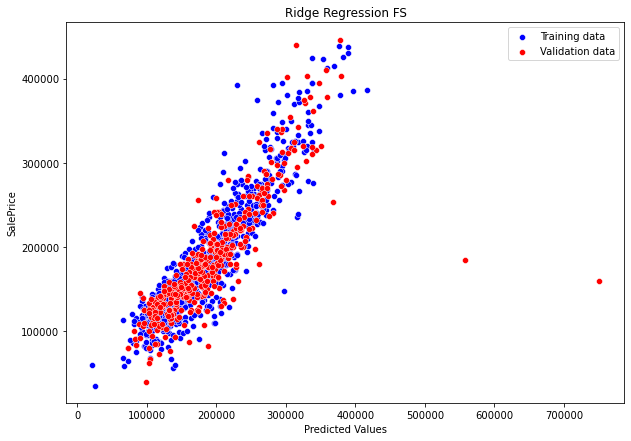

In [23]:
model_ridge_regression_fs = Ridge(alpha=0.1, solver='auto', random_state=42)
model_ridge_regression_fs.fit(X_train_, y_train_)
model_eval(model_ridge_regression_fs, 'Ridge Regression FS', X_train_, X_test_, y_train_, y_test_)

Lasso Regression FS RMSE on training set: 27979.51042836429
Lasso Regression FS RMSE on testing set: 45191.70394784142


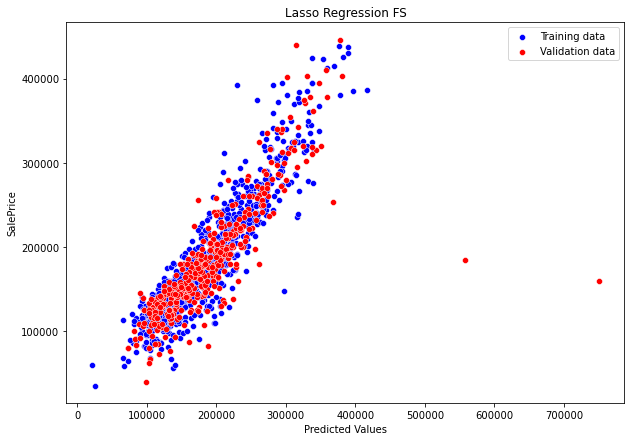

In [24]:
model_lasso_regression_fs = Lasso(alpha=0.1, precompute=True, max_iter=500, random_state=42)
model_lasso_regression_fs.fit(X_train_, y_train_)
model_eval(model_lasso_regression_fs, 'Lasso Regression FS', X_train_, X_test_, y_train_, y_test_)

Decision Tree Regression FS RMSE on training set: 965.8250557003187
Decision Tree Regression FS RMSE on testing set: 43812.55385711575


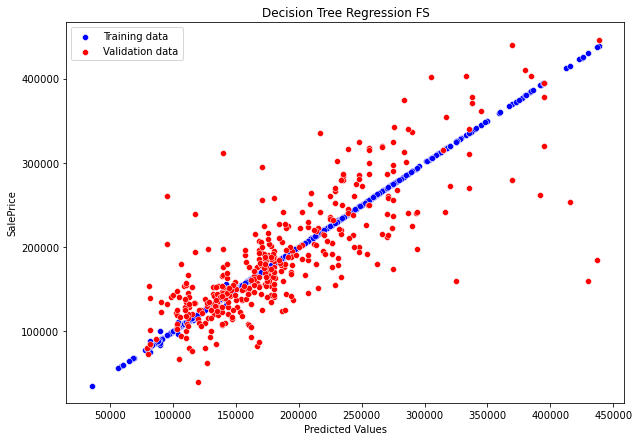

In [25]:
model_decision_tree_regressor_fs = DecisionTreeRegressor(random_state=42, max_features='sqrt')
model_decision_tree_regressor_fs.fit(X_train_, y_train_)
model_eval(model_decision_tree_regressor_fs, 'Decision Tree Regression FS', X_train_, X_test_, y_train_, y_test_)

Random Forest Regression FS RMSE on training set: 10550.415387825116
Random Forest Regression FS RMSE on testing set: 31164.49873247914


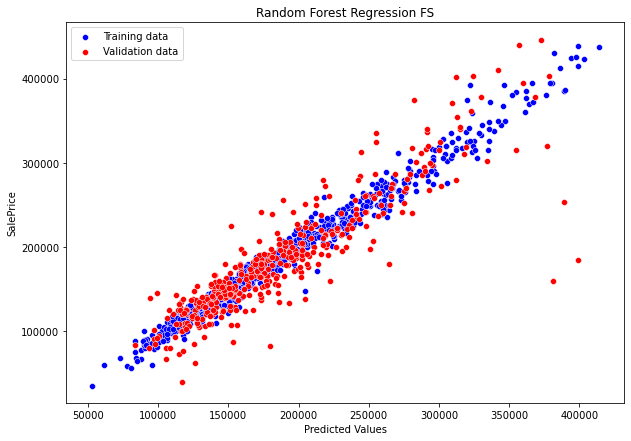

In [26]:
model_random_forest_regressor_fs = RandomForestRegressor(n_estimators=500, random_state=42, max_features='log2')
model_random_forest_regressor_fs.fit(X_train_, y_train_)
model_eval(model_random_forest_regressor_fs, 'Random Forest Regression FS', X_train_, X_test_, y_train_, y_test_)

Gradient Boosting Regression FS RMSE on training set: 7297.999755630639
Gradient Boosting Regression FS RMSE on testing set: 33236.11235363049


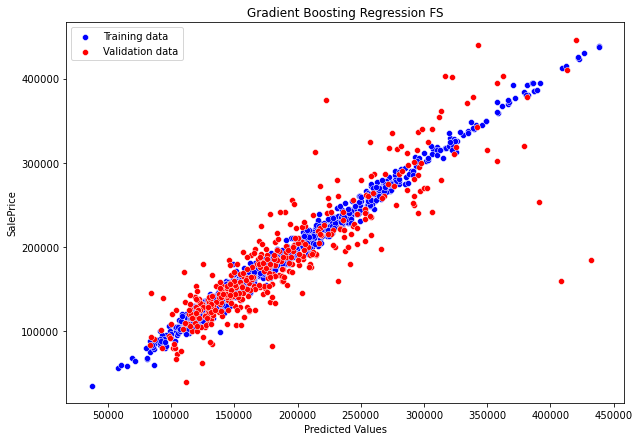

In [27]:
model_gradient_boosting_regressor_fs = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
model_gradient_boosting_regressor_fs.fit(X_train_, y_train_)
model_eval(model_gradient_boosting_regressor_fs, 'Gradient Boosting Regression FS', X_train_, X_test_, y_train_, y_test_)

SVR FS RMSE on training set: 35812.68279295286
SVR FS RMSE on testing set: 56248.56133967211


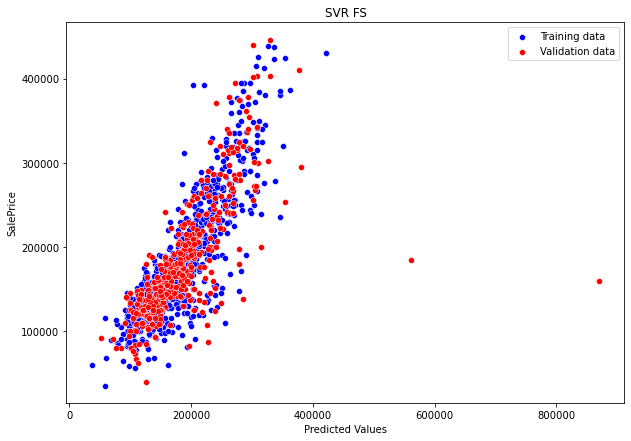

In [28]:
model_svr_fs = SVR(kernel='linear', C=2.0, epsilon=0.3)
model_svr_fs.fit(X_train_, y_train_)
model_eval(model_svr_fs, 'SVR FS', X_train_, X_test_, y_train_, y_test_)

XGBoost Regression FS RMSE on training set: 1215.3964646905079
XGBoost Regression FS RMSE on testing set: 35512.714513263105


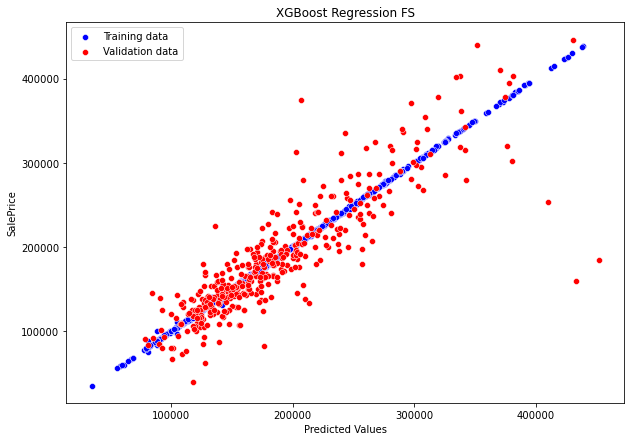

In [29]:
model_xgboost_regressor_fs = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.9)
model_xgboost_regressor_fs.fit(X_train_, y_train_)
model_eval(model_xgboost_regressor_fs, 'XGBoost Regression FS', X_train_, X_test_, y_train_, y_test_)

In [30]:
from vecstack import stacking

models = [model_linear_regression_fs,
          model_logistic_regression_fs,
          model_lasso_regression_fs,
          model_ridge_regression_fs,
          model_decision_tree_regressor_fs,
          model_random_forest_regressor_fs,
          model_svr_fs, 
          model_gradient_boosting_regressor_fs,
          model_xgboost_regressor_fs]

S_train, S_test = stacking(models, X_train_, y_train_, X_test_, regression=True, verbose=2, shuffle=True)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [9]

model  0:     [LinearRegression]
    fold  0:  [21496.11658716]
    fold  1:  [18976.69815123]
    fold  2:  [21346.73042580]
    fold  3:  [22076.44779199]
    ----
    MEAN:     [20973.99823904] + [1184.91977683]
    FULL:     [20972.80897308]

model  1:     [LogisticRegression]
    fold  0:  [38952.96551724]
    fold  1:  [33549.69827586]
    fold  2:  [34320.38362069]
    fold  3:  [33129.79653680]
    ----
    MEAN:     [34988.21098765] + [2328.53467685]
    FULL:     [34990.21574973]

model  2:     [Lasso]
    fold  0:  [21496.11480646]
    fold  1:  [18976.68963979]
    fold  2:  [21346.70576650]
    fold  3:  [22076.49271863]
    ----
    MEAN:     [20974.00073285] + [1184.93167832]
    FULL:     [20972.81142110]

model  3:     [Ridge]
    fold  0:  [21496.08652105]
    fold  1:  [18976.19486479]
    fold  2:  [21346.30885484]
    fold  3:  [22076.18009526]
    ----
  

Linear Regression FS stacked RMSE on training set: 27063.60777156054
Linear Regression FS stacked RMSE on testing set: 36195.87406145082


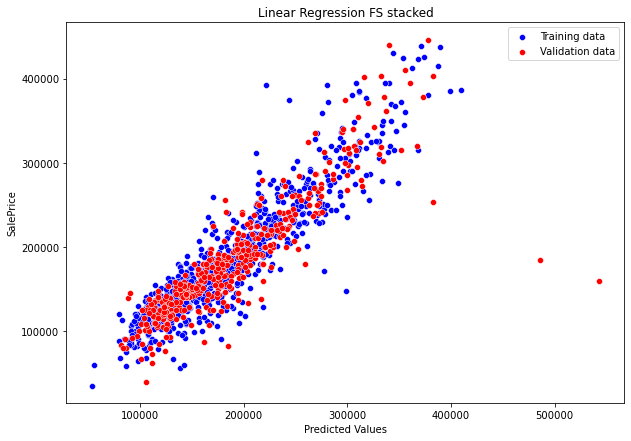

In [31]:
model_linear_regression_fs_stack = LinearRegression()
model_linear_regression_fs_stack.fit(S_train, y_train_)
model_eval(model_linear_regression_fs_stack, 'Linear Regression FS stacked', S_train, S_test, y_train_, y_test_)

Logistic Regression FS stacked RMSE on training set: 75454.24900823664
Logistic Regression FS stacked RMSE on testing set: 78330.99219712097


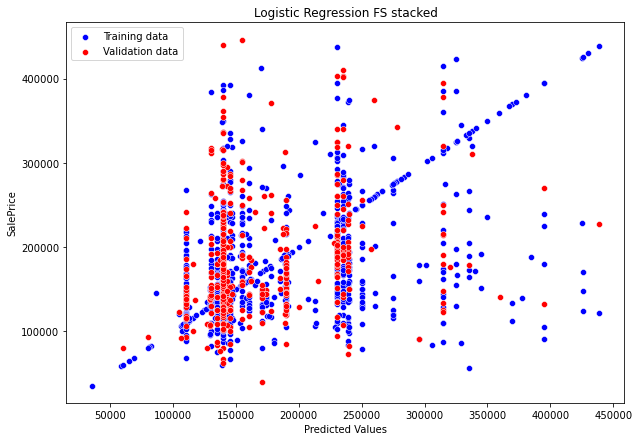

In [32]:
model_logistic_regression_fs_stack = LogisticRegression(penalty='l2', solver='liblinear', max_iter=300)
model_logistic_regression_fs_stack.fit(S_train, y_train_)
model_eval(model_logistic_regression_fs_stack, 'Logistic Regression FS stacked', S_train, S_test, y_train_, y_test_)

Ridge Regression FS stacked RMSE on training set: 27063.60956013408
Ridge Regression FS stacked RMSE on testing set: 36196.55021670879


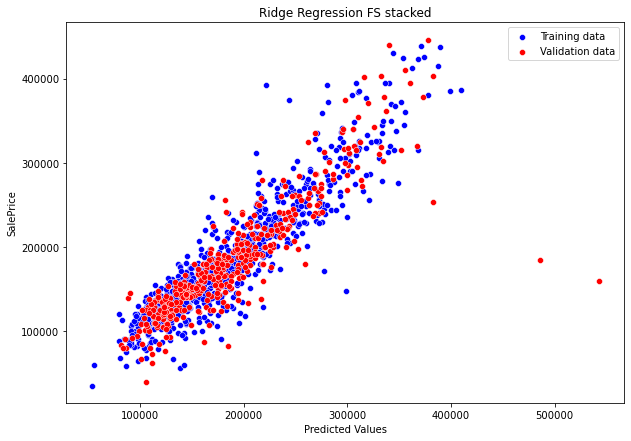

In [33]:
model_ridge_regression_fs_stack = Ridge(alpha=0.1, solver='auto', random_state=42)
model_ridge_regression_fs_stack.fit(S_train, y_train_)
model_eval(model_ridge_regression_fs_stack, 'Ridge Regression FS stacked', S_train, S_test, y_train_, y_test_)

F:\Main\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342833855466.842, tolerance: 438892070.2907893
  model = cd_fast.enet_coordinate_descent_gram(


Lasso Regression FS stacked RMSE on training set: 27197.661292445955
Lasso Regression FS stacked RMSE on testing set: 36418.1718654414


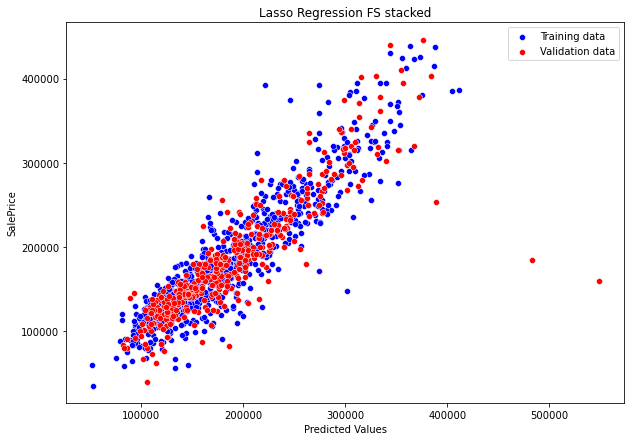

In [34]:
model_lasso_regression_fs_stack = Lasso(alpha=0.1, precompute=True, max_iter=1000, random_state=42)
model_lasso_regression_fs_stack.fit(S_train, y_train_)
model_eval(model_lasso_regression_fs_stack, 'Lasso Regression FS stacked', S_train, S_test, y_train_, y_test_)

Decision Tree Regression FS stacked RMSE on training set: 699.5259606185377
Decision Tree Regression FS stacked RMSE on testing set: 43837.38299409942


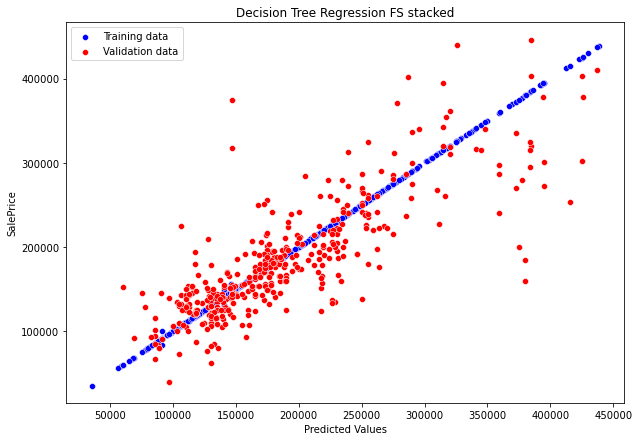

In [35]:
model_decision_tree_regressor_fs_stack = DecisionTreeRegressor(random_state=42, max_features='sqrt')
model_decision_tree_regressor_fs_stack.fit(S_train, y_train_)
model_eval(model_decision_tree_regressor_fs_stack, 'Decision Tree Regression FS stacked', S_train, S_test, y_train_, y_test_)

Random Forest Regression FS stacked RMSE on training set: 10521.94112092096
Random Forest Regression FS stacked RMSE on testing set: 30963.91374202126


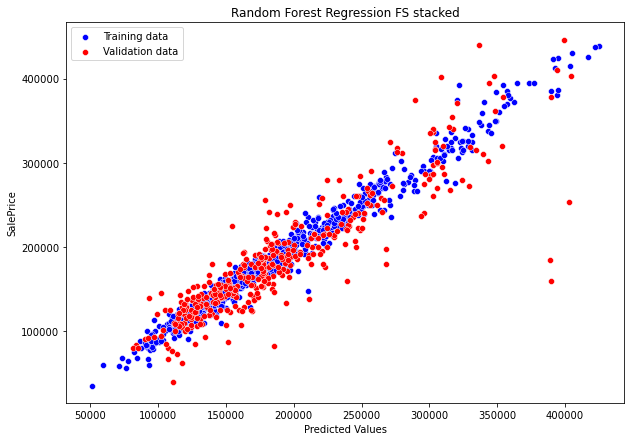

In [36]:
model_random_forest_regressor_fs_stack = RandomForestRegressor(n_estimators=500, random_state=42, max_features='log2')
model_random_forest_regressor_fs_stack.fit(S_train, y_train_)
model_eval(model_random_forest_regressor_fs_stack, 'Random Forest Regression FS stacked', S_train, S_test, y_train_, y_test_)

Gradient Boosting Regression FS stacked RMSE on training set: 6344.5689214282165
Gradient Boosting Regression FS stacked RMSE on testing set: 31616.933432110312


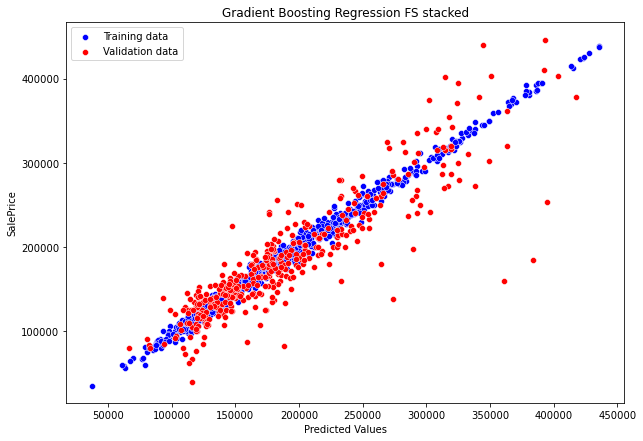

In [37]:
model_gradient_boosting_regressor_fs_stack = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
model_gradient_boosting_regressor_fs_stack.fit(S_train, y_train_)
model_eval(model_gradient_boosting_regressor_fs_stack, 'Gradient Boosting Regression FS stacked', S_train, S_test, y_train_, y_test_)

SVR FS stacked RMSE on training set: 87072.60328329084
SVR FS stacked RMSE on testing set: 79901.36998119808


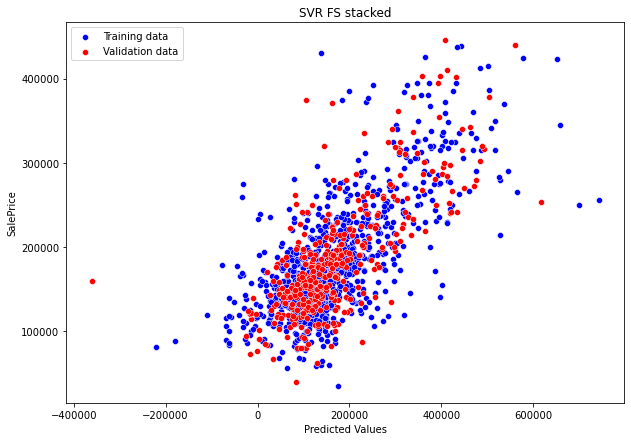

In [38]:
model_svr_fs_stack = SVR(kernel='linear', C=2.0, epsilon=0.3)
model_svr_fs_stack.fit(S_train, y_train_)
model_eval(model_svr_fs_stack, 'SVR FS stacked', S_train, S_test, y_train_, y_test_)

XGBoost Regression FS stacked RMSE on training set: 781.3362606191295
XGBoost Regression FS stacked RMSE on testing set: 31172.40280091538


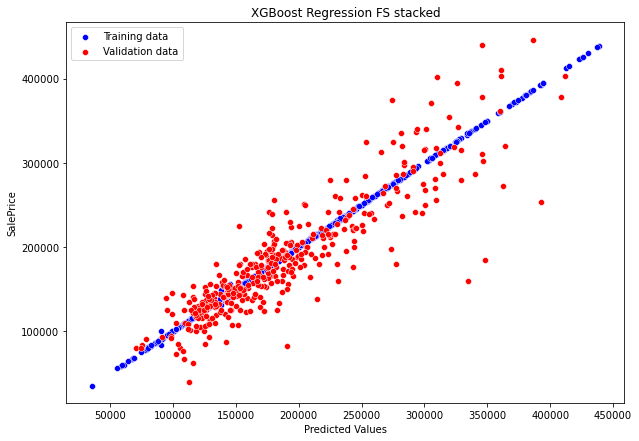

In [39]:
model_xgboost_regressor_fs_stack = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.9)
model_xgboost_regressor_fs_stack.fit(S_train, y_train_)
model_eval(model_xgboost_regressor_fs_stack, 'XGBoost Regression FS stacked', S_train, S_test, y_train_, y_test_)

In [40]:
print('Testing errors: ')
for name, val in RMSE_LIST_TESTING.items():
    print(f'Model {name}: ______{val}_____')

print('\n\nTraning errors: ')
for name, val in RMSE_LIST_TRAINING.items():
    print(f'Model {name}: ______{val}_____')

Testing errors: 
Model Linear Regression: ______55189.33638117506_____
Model Logistic Regression: ______57115.60955647293_____
Model Ridge Regression: ______55182.51066456452_____
Model Lasso Regression: ______55189.28095676163_____
Model Decision Tree Regression: ______44984.00437607203_____
Model Random Forest Regression: ______36069.8052017577_____
Model Gradient Boosting Regression: ______39004.80721024725_____
Model SVR: ______55531.535598281815_____
Model XGBoost Regression: ______38166.50035059758_____
Model Linear Regression FS: ______45191.635013106315_____
Model Logistic Regression FS: ______50855.190187531996_____
Model Ridge Regression FS: ______45192.04706038173_____
Model Lasso Regression FS: ______45191.70394784142_____
Model Decision Tree Regression FS: ______43812.55385711575_____
Model Random Forest Regression FS: ______31164.49873247914_____
Model Gradient Boosting Regression FS: ______33236.11235363049_____
Model SVR FS: ______56248.56133967211_____
Model XGBoost Re